In [170]:
import requests
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
!pip install yfinance

In [171]:
import yfinance as yf
import plotly.express as px 

In [172]:
#connect to website

URL = 'https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"}

page = requests.get(URL, headers=headers)

if page.status_code == 200:
    data = page.json()  # Parse JSON directly
    print(data)

{'name': 'NIFTY 50', 'advance': {'declines': '25', 'advances': '25', 'unchanged': '0'}, 'timestamp': '17-Feb-2025 13:16:52', 'data': [{'priority': 1, 'symbol': 'NIFTY 50', 'identifier': 'NIFTY 50', 'open': 22809.9, 'dayHigh': 22926.65, 'dayLow': 22725.45, 'lastPrice': 22839.05, 'previousClose': 22929.25, 'change': -90.20000000000073, 'pChange': -0.39, 'ffmc': 1023066250.66, 'yearHigh': 26277.35, 'yearLow': 21281.45, 'totalTradedVolume': 137016939, 'stockIndClosePrice': 0, 'totalTradedValue': 124864221108.4, 'lastUpdateTime': '17-Feb-2025 13:16:52', 'nearWKH': 13.084652752275247, 'nearWKL': -7.319050158706284, 'perChange365d': 4.03, 'date365dAgo': '16-Feb-2024', 'chart365dPath': 'https://nsearchives.nseindia.com/365d/NIFTY-50.svg', 'date30dAgo': '17-Jan-2025', 'perChange30d': -1.18, 'chart30dPath': 'https://nsearchives.nseindia.com/30d/NIFTY-50.svg', 'chartTodayPath': 'https://nsearchives.nseindia.com/today/NIFTY-50.svg'}, {'priority': 0, 'symbol': 'INDUSINDBK', 'identifier': 'INDUSINDB

In [176]:
stock_data = data['data']
df = pd.DataFrame(stock_data)

In [178]:
print(df)

    priority      symbol     identifier      open   dayHigh    dayLow  \
0          1    NIFTY 50       NIFTY 50  22809.90  22926.65  22725.45   
1          0  INDUSINDBK  INDUSINDBKEQN   1024.40   1044.90   1013.10   
2          0  BAJAJFINSV  BAJAJFINSVEQN   1841.30   1893.05   1830.45   
3          0   POWERGRID   POWERGRIDEQN    256.90    261.85    252.20   
4          0    ADANIENT    ADANIENTEQN   2152.65   2197.90   2110.65   
5          0   COALINDIA   COALINDIAEQN    354.20    358.85    349.25   
6          0  SHRIRAMFIN  SHRIRAMFINEQN    537.00    548.05    525.10   
7          0  ASIANPAINT  ASIANPAINTEQN   2231.30   2259.70   2226.05   
8          0   SUNPHARMA   SUNPHARMAEQN   1700.50   1735.35   1696.05   
9          0      GRASIM      GRASIMEQN   2431.30   2467.30   2405.55   
10         0       CIPLA       CIPLAEQN   1457.45   1480.70   1451.30   
11         0   NESTLEIND   NESTLEINDEQN   2195.85   2214.00   2170.00   
12         0     SBILIFE     SBILIFEEQN   1460.50  

In [180]:
symbols_list = df['symbol'].tolist()

In [182]:
print(symbols_list)

['NIFTY 50', 'INDUSINDBK', 'BAJAJFINSV', 'POWERGRID', 'ADANIENT', 'COALINDIA', 'SHRIRAMFIN', 'ASIANPAINT', 'SUNPHARMA', 'GRASIM', 'CIPLA', 'NESTLEIND', 'SBILIFE', 'ULTRACEMCO', 'ADANIPORTS', 'HDFCBANK', 'ONGC', 'TATAMOTORS', 'BAJFINANCE', 'RELIANCE', 'HINDUNILVR', 'EICHERMOT', 'NTPC', 'MARUTI', 'BRITANNIA', 'JSWSTEEL', 'SBIN', 'BAJAJ-AUTO', 'DRREDDY', 'HEROMOTOCO', 'TITAN', 'HINDALCO', 'HCLTECH', 'APOLLOHOSP', 'TATACONSUM', 'TCS', 'TECHM', 'BPCL', 'HDFCLIFE', 'LT', 'KOTAKBANK', 'ITC', 'TATASTEEL', 'INFY', 'TRENT', 'ICICIBANK', 'BHARTIARTL', 'AXISBANK', 'WIPRO', 'BEL', 'M&M']


In [184]:
symbols_list[0] = '^NSEI'

In [186]:
#len(symbols_list)

In [188]:
data_frames1 = {"Date": []}

full_symbol = symbols_list[0]
print(f"Fetching data for {full_symbol}...")
data = yf.download(full_symbol, start="2024-7-01", end="2025-02-01")
data_frames1['Date'] = data.index.strftime('%Y-%m-%d').tolist()
for column in ['Open', 'Close', 'High', 'Low', 'Volume']:
    data_frames1[column] = data[column].values.tolist()

[*********************100%***********************]  1 of 1 completed

Fetching data for ^NSEI...


In [190]:
df1 = pd.DataFrame(data_frames1)
df1.index = pd.Index(range(149))
print("Nifty 50 Historical Data (2024-7-01 to 2025-02-01)")
df1["Close"] = df1["Close"].apply(lambda x: x[0])
df1["Date"] = pd.to_datetime(df1["Date"])
df1

Nifty 50 Historical Data (2024-7-01 to 2025-02-01)


,Date,Open,Close,High,Low,Volume
0,2024-07-01,[23992.94921875],24141.949219,[24164.0],[23992.69921875],[0]
1,2024-07-02,[24228.75],24123.849609,[24236.349609375],[24056.400390625],[0]
2,2024-07-03,[24291.75],24286.500000,[24309.150390625],[24207.099609375],[0]
3,2024-07-04,[24369.94921875],24302.150391,[24401.0],[24281.0],[251200]
4,2024-07-05,[24213.349609375],24323.849609,[24363.0],[24168.849609375],[298400]
...,...,...,...,...,...,...
144,2025-01-27,[22940.150390625],22829.150391,[23007.44921875],[22786.900390625],[257400]
145,2025-01-28,[22960.44921875],22957.250000,[23137.94921875],[22857.650390625],[361900]
146,2025-01-29,[23026.75],23163.099609,[23183.349609375],[22976.5],[226300]
147,2025-01-30,[23169.5],23249.500000,[23322.05078125],[23139.19921875],[361900]


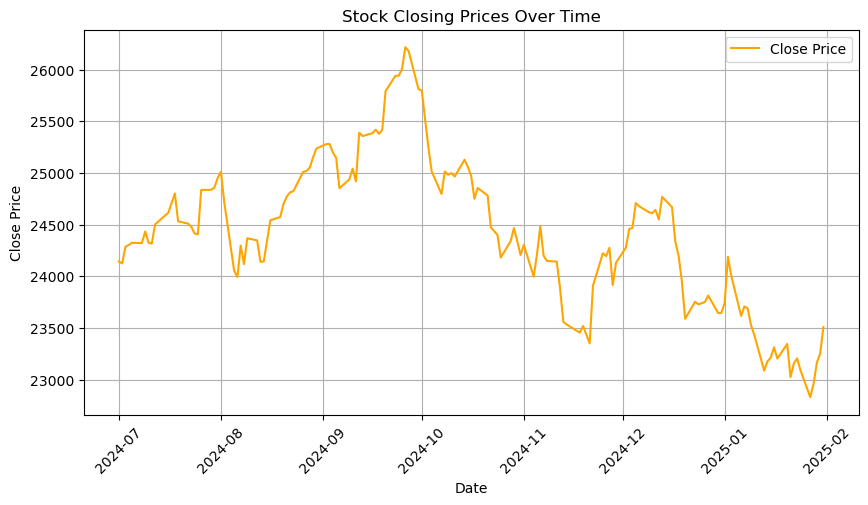

In [192]:
plt.figure(figsize=(10, 5))
plt.plot(df1["Date"], df1["Close"], linestyle='-', color='orange', label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Prices Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [193]:
# Define correction events with dates and reasons
correction_events = {
    "2024-10-04": "FII outflows increase\nand weak quarterly earnings",
    "2024-12-16": "Indian rupee hits record low\namid rising U.S. Bond yields",
    "2024-11-24": "NDA's big win in Maharashtra\nalong with rupee's strongest gain\nin 5 months",
}

In [196]:
continuous_event = {
    "start_date": "2025-01-01",
    "end_date": "2025-01-27",
    "reason": "FPI pulls out $8.3 billion\nfrom Indian equities\nin january"
}

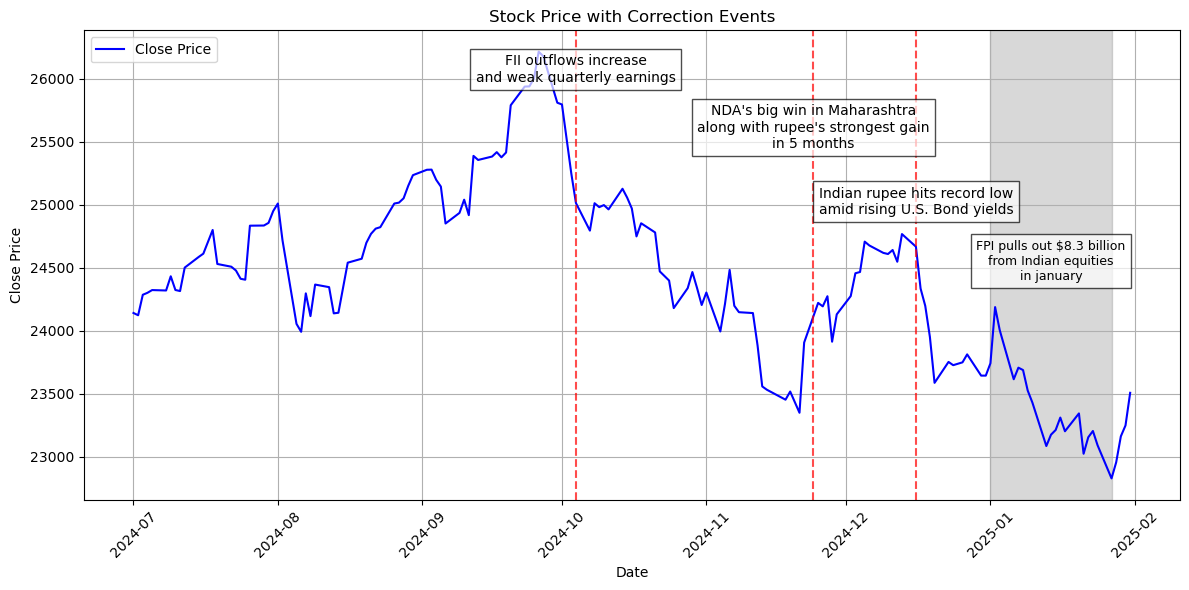

In [198]:
# Plot the stock price
plt.figure(figsize=(12, 6))
plt.plot(df1["Date"], df1["Close"], linestyle="-", color="b", label="Close Price")

y_positions = [df1["Close"].max() * 0.99, df1["Close"].max() * 0.95,  
               df1["Close"].max() * 0.97, df1["Close"].max() * 0.93]

for i, (date, reason) in enumerate(correction_events.items()):
    event_date = pd.to_datetime(date)
    plt.axvline(event_date, color="red", linestyle="--", alpha=0.7)
    plt.text(event_date, y_positions[i], reason, rotation=0,  
             verticalalignment="bottom", fontsize=10, color="black", ha="center",  
             bbox=dict(facecolor="white", alpha=0.7))

start = pd.to_datetime(continuous_event["start_date"])
end = pd.to_datetime(continuous_event["end_date"])
plt.axvspan(start, end, color="gray", alpha=0.3)
plt.text(start + (end - start) / 2, df1["Close"].max() * 0.93, continuous_event["reason"],
         rotation=0, verticalalignment="bottom", fontsize=9, color="black",
         ha="center", bbox=dict(facecolor="white", alpha=0.7))

# Labels and formatting
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Price with Correction Events")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("my_plot.png")
plt.show()

In [199]:
data_frames = {"Date": []}
for i, symbol in enumerate(symbols_list):
    full_symbol = symbol if i == 0 else f"{symbol}.NS"
    print(f"Fetching data for {full_symbol}...")
    data = yf.download(full_symbol, start="2024-09-01", end="2025-02-01")
    data_frames['Date'] = data.index.strftime('%Y-%m-%d').tolist()
    data_frames[symbol] = data['Close'].values.tolist()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for ^NSEI...
Fetching data for INDUSINDBK.NS...
Fetching data for BAJAJFINSV.NS...
Fetching data for POWERGRID.NS...
Fetching data for ADANIENT.NS...
Fetching data for COALINDIA.NS...
Fetching data for SHRIRAMFIN.NS...
Fetching data for ASIANPAINT.NS...
Fetching data for SUNPHARMA.NS...
Fetching data for GRASIM.NS...
Fetching data for CIPLA.NS...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for NESTLEIND.NS...
Fetching data for SBILIFE.NS...
Fetching data for ULTRACEMCO.NS...
Fetching data for ADANIPORTS.NS...
Fetching data for HDFCBANK.NS...
Fetching data for ONGC.NS...
Fetching data for TATAMOTORS.NS...
Fetching data for BAJFINANCE.NS...
Fetching data for RELIANCE.NS...
Fetching data for HINDUNILVR.NS...
Fetching data for EICHERMOT.NS...
Fetching data for NTPC.NS...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for MARUTI.NS...
Fetching data for BRITANNIA.NS...
Fetching data for JSWSTEEL.NS...
Fetching data for SBIN.NS...
Fetching data for BAJAJ-AUTO.NS...
Fetching data for DRREDDY.NS...
Fetching data for HEROMOTOCO.NS...
Fetching data for TITAN.NS...
Fetching data for HINDALCO.NS...
Fetching data for HCLTECH.NS...
Fetching data for APOLLOHOSP.NS...
Fetching data for TATACONSUM.NS...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for TCS.NS...
Fetching data for TECHM.NS...
Fetching data for BPCL.NS...
Fetching data for HDFCLIFE.NS...
Fetching data for LT.NS...
Fetching data for KOTAKBANK.NS...
Fetching data for ITC.NS...
Fetching data for TATASTEEL.NS...
Fetching data for INFY.NS...
Fetching data for TRENT.NS...
Fetching data for ICICIBANK.NS...
Fetching data for BHARTIARTL.NS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AXISBANK.NS...
Fetching data for WIPRO.NS...
Fetching data for BEL.NS...
Fetching data for M&M.NS...


In [200]:
df = pd.DataFrame(data_frames)
pd.set_option('display.max_rows', 100)

In [202]:
df

,Date,^NSEI,INDUSINDBK,BAJAJFINSV,POWERGRID,ADANIENT,COALINDIA,SHRIRAMFIN,ASIANPAINT,SUNPHARMA,...,ITC,TATASTEEL,INFY,TRENT,ICICIBANK,BHARTIARTL,AXISBANK,WIPRO,BEL,M&M
0,2024-09-02,[25278.69921875],[1449.050048828125],[1840.550048828125],[326.9776916503906],[3042.14990234375],[495.0387878417969],[619.8914184570312],[3145.558349609375],[1805.0714111328125],...,[502.124267578125],[152.8800048828125],[1942.3837890625],[7148.2001953125],[1229.949951171875],[1571.3499755859375],[1188.800048828125],[261.0379638671875],[296.8999938964844],[2777.0]
1,2024-09-03,[25279.849609375],[1436.699951171875],[1865.5999755859375],[326.1007080078125],[3036.10009765625],[493.8507385253906],[628.7999267578125],[3149.45166015625],[1800.6480712890625],...,[501.484375],[152.14999389648438],[1919.3955078125],[7042.7998046875],[1247.699951171875],[1560.5999755859375],[1191.5999755859375],[262.8028869628906],[297.1499938964844],[2784.85009765625]
2,2024-09-04,[25198.69921875],[1434.4000244140625],[1871.9000244140625],[324.3953857421875],[3012.35009765625],[478.691162109375],[623.485595703125],[3226.1201171875],[1821.8701171875],...,[498.4817810058594],[151.17999267578125],[1900.80712890625],[7139.89990234375],[1236.3499755859375],[1561.9000244140625],[1177.699951171875],[254.5175323486328],[298.95001220703125],[2749.60009765625]
3,2024-09-05,[25145.099609375],[1422.9000244140625],[1864.949951171875],[322.78753662109375],[3015.35009765625],[472.3707275390625],[623.7835083007812],[3232.708984375],[1815.5582275390625],...,[503.25640869140625],[151.72000122070312],[1911.38671875],[7167.64990234375],[1235.949951171875],[1547.199951171875],[1180.550048828125],[257.3119812011719],[290.6000061035156],[2723.10009765625]
4,2024-09-06,[24852.150390625],[1409.3499755859375],[1857.1500244140625],[321.3746032714844],[2975.449951171875],[464.3394775390625],[621.8903198242188],[3268.09814453125],[1813.6199951171875],...,[493.904052734375],[151.22000122070312],[1880.4390869140625],[7103.5498046875],[1208.1500244140625],[1539.25],[1158.75],[255.22837829589844],[283.6000061035156],[2698.10009765625]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2025-01-27,[22829.150390625],[926.4500122070312],[1711.5999755859375],[283.682373046875],[2259.699951171875],[370.2852478027344],[509.27374267578125],[2251.5],[1776.145751953125],...,[433.26123046875],[126.37000274658203],[1822.0],[5412.60009765625],[1227.949951171875],[1602.5999755859375],[948.0999755859375],[301.95001220703125],[262.95001220703125],[2831.60009765625]
102,2025-01-28,[22957.25],[934.1500244140625],[1768.949951171875],[280.6676330566406],[2286.050048828125],[365.2593994140625],[527.6380615234375],[2241.800048828125],[1695.2830810546875],...,[428.6835021972656],[128.6199951171875],[1829.75],[5455.10009765625],[1246.9000244140625],[1618.3499755859375],[983.7999877929688],[303.6000061035156],[258.25],[2870.60009765625]
103,2025-01-29,[23163.099609375],[948.2999877929688],[1790.4000244140625],[284.5225524902344],[2318.60009765625],[373.93145751953125],[550.9293823242188],[2223.14990234375],[1724.9542236328125],...,[426.6161193847656],[130.8000030517578],[1881.25],[5597.14990234375],[1251.6500244140625],[1600.449951171875],[983.4000244140625],[312.45001220703125],[267.20001220703125],[2924.35009765625]
104,2025-01-30,[23249.5],[957.0499877929688],[1745.199951171875],[291.93585205078125],[2252.60009765625],[379.4499816894531],[535.7999877929688],[2249.85009765625],[1728.6817626953125],...,[429.4218444824219],[131.1199951171875],[1859.949951171875],[5511.2001953125],[1255.5999755859375],[1640.75],[984.7000122070312],[309.0],[278.75],[2971.449951171875]


In [203]:
#Handling missing Values
df.count()

Date          106
^NSEI         106
INDUSINDBK    106
BAJAJFINSV    106
POWERGRID     106
ADANIENT      106
COALINDIA     106
SHRIRAMFIN    106
ASIANPAINT    106
SUNPHARMA     106
GRASIM        106
CIPLA         106
NESTLEIND     106
SBILIFE       106
ULTRACEMCO    106
ADANIPORTS    106
HDFCBANK      106
ONGC          106
TATAMOTORS    106
BAJFINANCE    106
RELIANCE      106
HINDUNILVR    106
EICHERMOT     106
NTPC          106
MARUTI        106
BRITANNIA     106
JSWSTEEL      106
SBIN          106
BAJAJ-AUTO    106
DRREDDY       106
HEROMOTOCO    106
TITAN         106
HINDALCO      106
HCLTECH       106
APOLLOHOSP    106
TATACONSUM    106
TCS           106
TECHM         106
BPCL          106
HDFCLIFE      106
LT            106
KOTAKBANK     106
ITC           106
TATASTEEL     106
INFY          106
TRENT         106
ICICIBANK     106
BHARTIARTL    106
AXISBANK      106
WIPRO         106
BEL           106
M&M           106
dtype: int64

In [204]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [210]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 52 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [212]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [214]:
def clean_value(x):
    try:
        return float(str(x).replace("[", "").replace("]", ""))  # Remove brackets and convert to float
    except:
        return None

# Apply cleaning function to all columns (since all are object type)
df = df.applymap(clean_value)

print(df.dtypes)

^NSEI         float64
INDUSINDBK    float64
BAJAJFINSV    float64
POWERGRID     float64
ADANIENT      float64
COALINDIA     float64
SHRIRAMFIN    float64
ASIANPAINT    float64
SUNPHARMA     float64
GRASIM        float64
CIPLA         float64
NESTLEIND     float64
SBILIFE       float64
ULTRACEMCO    float64
ADANIPORTS    float64
HDFCBANK      float64
ONGC          float64
TATAMOTORS    float64
BAJFINANCE    float64
RELIANCE      float64
HINDUNILVR    float64
EICHERMOT     float64
NTPC          float64
MARUTI        float64
BRITANNIA     float64
JSWSTEEL      float64
SBIN          float64
BAJAJ-AUTO    float64
DRREDDY       float64
HEROMOTOCO    float64
TITAN         float64
HINDALCO      float64
HCLTECH       float64
APOLLOHOSP    float64
TATACONSUM    float64
TCS           float64
TECHM         float64
BPCL          float64
HDFCLIFE      float64
LT            float64
KOTAKBANK     float64
ITC           float64
TATASTEEL     float64
INFY          float64
TRENT         float64
ICICIBANK 

C:\Users\Anurag Rawat\AppData\Local\Temp\ipykernel_2108\2170073940.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_value)


In [216]:
# Get the first and last available stock prices
start_prices = df.loc[df.index.min()]
end_prices = df.loc[df.index.max()]

# Calculate percentage change
percentage_change = ((end_prices - start_prices) / start_prices) * 100

# Find Top 5 Gainers & Losers
top_gainers = percentage_change.nlargest(5)
top_losers = percentage_change.nsmallest(5)

In [218]:
print(" Top 5 Gainers:\n ---------------")
print(top_gainers)
print("\n Top 5 Losers:\n ---------------")
print(top_losers)

 Top 5 Gainers:
 ---------------
WIPRO         19.484534
M&M            7.664750
KOTAKBANK      6.799610
BAJFINANCE     5.981819
EICHERMOT      5.748218
dtype: float64

 Top 5 Losers:
 ---------------
TATAMOTORS   -34.462091
INDUSINDBK   -31.596565
ASIANPAINT   -26.855592
ADANIPORTS   -26.440283
BPCL         -25.719328
dtype: float64


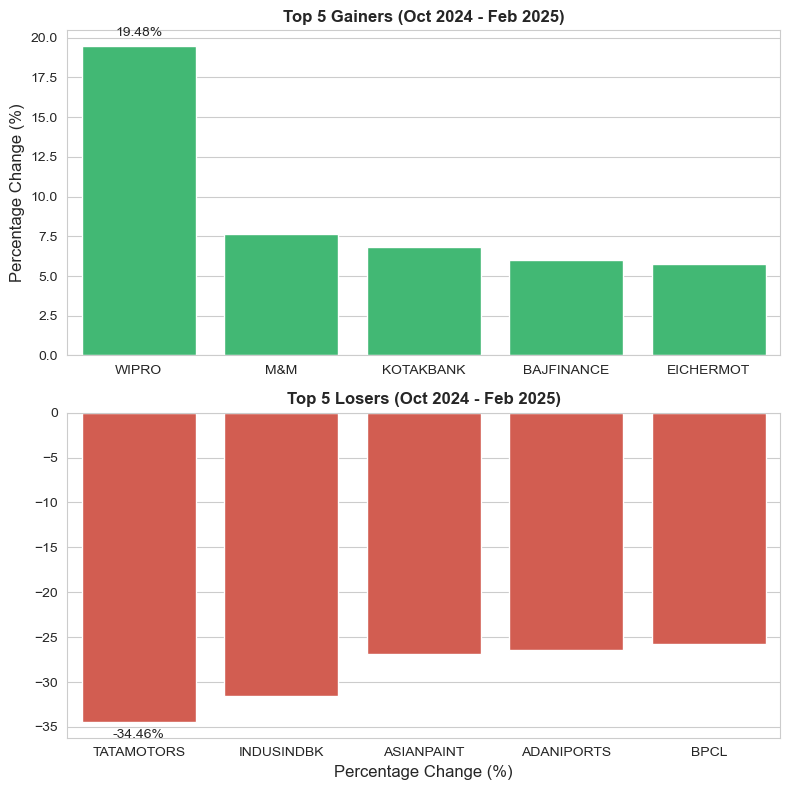

In [290]:
# Set plot style
sns.set_style("whitegrid")

gain_color = "#2ECC71"
loss_color = "#E74C3C"

# Create figure
ig, axes = plt.subplots(2, 1, figsize=(8, 8))

sns.barplot(x=top_gainers.index, y=top_gainers.values, ax=axes[0], hue=top_gainers.index, palette=[gain_color] * 5, legend=False)
axes[0].set_title("Top 5 Gainers (Oct 2024 - Feb 2025)", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Percentage Change (%)", fontsize=12)
axes[0].set_xlabel("")
axes[0].bar_label(axes[0].containers[0], fmt="%.2f%%", padding=5, fontsize=10)

# Plot Losers
sns.barplot(x=top_losers.index, y=top_losers.values, ax=axes[1], hue=top_losers.index, palette=[loss_color] * 5, legend=False)
axes[1].set_title("Top 5 Losers (Oct 2024 - Feb 2025)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Percentage Change (%)", fontsize=12)
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0], fmt="%.2f%%", padding=5, fontsize=10)

# Final touches
plt.tight_layout()
plt.show()